# Extraire les données et les  valeurs des points clés

In [2]:
import cv2           
import numpy as np   
import os            
from matplotlib import pyplot as plt



import time          
import mediapipe as mp  #pour la detection de corps
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical  




# Initialiser MediaPipe Holistic, qui est une solution pour la détection du corps entier
mp_holistic = mp.solutions.holistic 

# Initialiser MediaPipe Drawing Utils, qui contient des utilitaires pour dessiner les annotations
mp_drawing = mp.solutions.drawing_utils




def mediapipe_detection(image, model):
    # Convertir l'image de BGR en RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    
    # Rendre l'image non modifiable (non writeable)
    image.flags.writeable = False                  # Image is no longer writeable
    
    # Faire la prédiction en utilisant le modèle MediaPipe
    results = model.process(image)                 # Make prediction
    
    # Rendre l'image modifiable à nouveau
    image.flags.writeable = True                   # Image is now writeable
    
    # Convertir l'image de RGB en BGR
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR CONVERSION RGB 2 BGR
    
    # Retourner l'image et les résultats de la prédiction
    return image, results




def draw_landmarks(image, results):
    # Dessiner les connexions du visage
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    
    # Dessiner les connexions de la pose (corps)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    
    # Dessiner les connexions de la main gauche
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    
    # Dessiner les connexions de la main droite
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

    
# draw_landmarks -> Function does not return the image but rather applies the landmark visualizations to the current image in place    



def draw_styled_landmarks(image, results):
    # Dessiner les connexions du visage
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             # Spécifications pour colorer les points de repère (points) du visage
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             # Spécifications pour colorer les connexions (lignes) du visage
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Dessiner les connexions de la pose (corps)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             # Spécifications pour colorer les points de repère (points) du corps
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             # Spécifications pour colorer les connexions (lignes) du corps
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Dessiner les connexions de la main gauche
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             # Spécifications pour colorer les points de repère (points) de la main gauche
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             # Spécifications pour colorer les connexions (lignes) de la main gauche
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Dessiner les connexions de la main droite  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             # Spécifications pour colorer les points de repère (points) de la main droite
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             # Spécifications pour colorer les connexions (lignes) de la main droite
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

    
#we are just formatting or updating our draw landmark function(that's not complusory though, u can use only standard drwa_landmark func)    
    



import cv2
import mediapipe as mp

# Initialiser la capture vidéo à partir de la webcam
cap = cv2.VideoCapture(0)

# Définir le modèle MediaPipe Holistic avec des seuils de détection et de suivi
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Lire le flux vidéo
        ret, frame = cap.read()
        
        if not ret:
            continue
        
        # Faire les détections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Dessiner les points de repère
        draw_styled_landmarks(image, results)  # Utiliser la fonction améliorée pour dessiner les points de repère avec des couleurs différentes
        
        # Afficher à l'écran
        cv2.imshow('OpenCV Feed', image)

        # Quitter proprement
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

# Libérer la capture vidéo et fermer les fenêtres
cap.release()
cv2.destroyAllWindows()


# Compter le nombre de points de repère détectés sur la pose (corps)
num_pose_landmarks = len(results.pose_landmarks.landmark) 


results


# Appeler la fonction pour dessiner les points de repère sur le visage, le corps, et les mains
draw_landmarks(frame, results)




pose = []               
# Pour chaque point de repère de la pose détecté, crée un tableau numpy avec les coordonnées x, y, z et la visibilité, puis ajoute-le à la liste 'pose'.
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)




# Crée un tableau numpy plat avec les coordonnées x, y, z et la visibilité des points de repère de la pose; sinon, initialise un tableau de zéros de taille 132 si aucun point de repère n'est détecté.
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)

# Crée un tableau numpy plat avec les coordonnées x, y, z des points de repère du visage; sinon, initialise un tableau de zéros de taille 1404 si aucun point de repère n'est détecté.
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

# Crée un tableau numpy plat avec les coordonnées x, y, z des points de repère de la main gauche; sinon, initialise un tableau de zéros de taille 63 si aucun point de repère n'est détecté.
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

# Crée un tableau numpy plat avec les coordonnées x, y, z des points de repère de la main droite; sinon, initialise un tableau de zéros de taille 63 si aucun point de repère n'est détecté.
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)



def extract_keypoints(results):
    # Crée un tableau numpy plat avec les coordonnées x, y, z et la visibilité des points de repère de la pose; sinon, initialise un tableau de zéros de taille 132 si aucun point de repère n'est détecté.
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    
    # Crée un tableau numpy plat avec les coordonnées x, y, z des points de repère du visage; sinon, initialise un tableau de zéros de taille 1404 si aucun point de repère n'est détecté.
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    
    # Crée un tableau numpy plat avec les coordonnées x, y, z des points de repère de la main gauche; sinon, initialise un tableau de zéros de taille 63 si aucun point de repère n'est détecté.
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    
    # Crée un tableau numpy plat avec les coordonnées x, y, z des points de repère de la main droite; sinon, initialise un tableau de zéros de taille 63 si aucun point de repère n'est détecté.
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    
    # Concatène tous les tableaux de points de repère (pose, visage, main gauche, main droite) en un seul tableau numpy.
    return np.concatenate([pose, face, lh, rh])



result_test = extract_keypoints(results)



np.save('0', result_test)   
# en enregistrant chaque image sous forme de tableau numpy à l'intérieur de notre dossier 'MP_Data', nous aurons donc 30 tableaux numpy dans chaque dossier d'actions


np.load('0.npy')

# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect, including Tunisian Sign Language actions in French (transliterated)
# Actions that we try to detect, including Tunisian Sign Language actions in French (transliterated)
actions = np.array([ 'n3ass','lunettes','je froid','3aslama', 'Chokran', 'Nhebbek', 'La',  'j aime', 'j aime pas', 'Nakel', 'Nchrob' ,  'Bahi',
      'Telephone',   's il te plait', 'pleur','fort', 'lissar','Waqtach',
    'Limine' , 'sghir', 'kbir', 'stop', 'sma3ni','fakar','chof'])





#Trente vidéos de données
no_sequences = 30

# Les vidéos dureront 30 images
sequence_length = 30


# Vérifie si le chemin de répertoire spécifié par DATA_PATH n'existe pas.
# Si le répertoire n'existe pas, il le crée.
if not os.path.exists(DATA_PATH):
    os.makedirs(DATA_PATH)



# Itère sur chaque action dans la liste d'actions
for action in actions: 
    # Pour chaque action, itère sur le nombre de séquences
    for sequence in range(no_sequences):
        try:
            # Essaye de créer un répertoire pour l'action et la séquence spécifiée dans DATA_PATH
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            # Ignore les erreurs (par exemple, si le répertoire existe déjà) et continue
            pass



label_map = {label:num for num, label in enumerate(actions)}




# Initialise deux listes vides pour stocker les séquences et les étiquettes
sequences, labels = [], []

# Itère à travers chaque action dans la liste d'actions
for action in actions:
    # Pour chaque action, itère à travers chaque séquence (vidéo)
    for sequence in range(no_sequences):
        # Crée une liste pour stocker les frames de la séquence actuelle
        window = []
        # Itère à travers chaque frame de la séquence
        for frame_num in range(sequence_length):
            # Charge les points de repère extraits (au format .npy) pour la frame courante
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            # Ajoute les points de repère à la fenêtre (séquence)
            window.append(res)
        # Ajoute la fenêtre (séquence complète) à la liste des séquences
        sequences.append(window)
        # Ajoute l'étiquette correspondant à l'action à la liste des étiquettes
        labels.append(label_map[action])


X = np.array(sequences)
y = to_categorical(labels).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

# creation et Evaluation les performances de model 

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam

# Définir le modèle
model = Sequential()

# Ajout de couches Conv1D pour extraire les caractéristiques
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

# Ajout de couches LSTM pour capturer les dépendances temporelles
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))
model.add(Dropout(0.2))

# Couche dense finale avec activation softmax pour la classification
model.add(Dense(len(actions), activation='softmax'))

# Compiler le modèle
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

# Évaluer le modèle
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

from tensorflow.keras.models import save_model

# Sauvegarder le modèle dans un fichier .h5
# model.save('CNN+LSTM.h5')




c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.0760 - loss: 3.2089 - val_accuracy: 0.0526 - val_loss: 3.2640
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.1062 - loss: 3.1028 - val_accuracy: 0.0263 - val_loss: 3.1434
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.1358 - loss: 2.9272 - val_accuracy: 0.0263 - val_loss: 2.9563
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.1361 - loss: 2.7801 - val_accuracy: 0.1053 - val_loss: 2.8239
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.1580 - loss: 2.6191 - val_accuracy: 0.0789 - val_loss: 2.7925
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.1804 - loss: 2.5478 - val_accuracy: 0.0263 - val_loss: 2.8330
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.1827 - loss: 2.4785 - val_accuracy: 0.2105 - val_loss: 2.6064
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2801 - loss: 2.3545 - val_accuracy: 0.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
Unique classes in y_true: [ 0  1  3  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21 22]
Unique classes in y_pred_classes: [ 0  1  3  5  6  7  8  9 10 11 12 13 15 16 17 18 19 21 22]
Accuracy000000000000000000: 0.9210526315789473
Precision: {'n3ass': 1.0, 'lunettes': 1.0, 'je froid': 1.0, '3aslama': 1.0, 'Chokran': 0.75, 'Nhebbek': 1.0, 'La': 1.0, 'j aime': 1.0, 'j aime pas': 1.0, 'Nakel': 0.8, 'Nchrob': 1.0, 'Bahi': 0.6666666666666666, 'Telephone': 1.0, 's il te plait': 1.0, 'pleur': 1.0, 'fort': 1.0, 'lissar': 1.0, 'Waqtach': 0.0, 'Limine': 1.0, 'sghir': 1.0}
Recall (Sensitivity): {'n3ass': 1.0, 'lunettes': 1.0, 'je froid': 1.0, '3aslama': 0.6666666666666666, 'Chokran': 1.0, 'Nhebbek': 1.0, 'La': 1.0, 'j aime': 1.0, 'j aime pas': 1.0, 'Nakel': 1.0, 'Nchrob': 1.0, 'Bahi': 1.0, 'Telephone': 1.0, 's il te plait': 1.0, 'pleur': 1.0, 'fort': 0.5, 'lissar': 1.0, 'Waqtach': 0.0, 'Limine': 1.0, 'sghir': 1.0}
F1 Score: {'n3ass': 1.0, 'lunettes': 1.0, 'je f

c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2148: UserWarning: labels size, 20, does not match size of target_names, 25
  warnings.warn(
c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classif

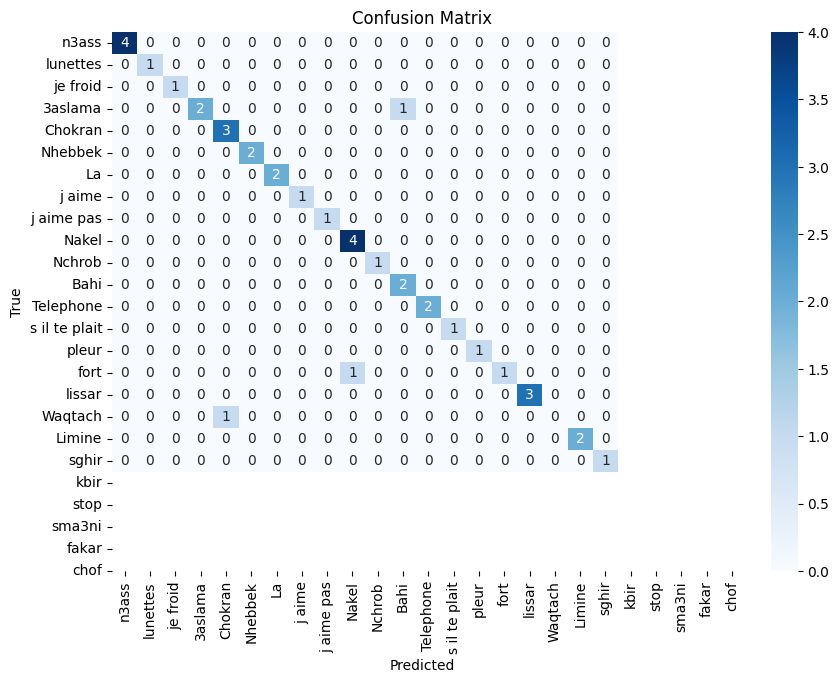

In [4]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtenir les prédictions du modèle sur l'ensemble de test
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Vérifiez les classes uniques
unique_y_true = np.unique(y_true)
unique_y_pred = np.unique(y_pred_classes)
print("Unique classes in y_true:", unique_y_true)
print("Unique classes in y_pred_classes:", unique_y_pred)


# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_true, y_pred_classes, labels=unique_y_true)

# Calculer le rapport de classification
report = classification_report(y_true, y_pred_classes, labels=unique_y_true, target_names=actions, output_dict=True)

# Extraire les métriques spécifiques
precision = {action: report[action]['precision'] for action in actions if action in report}
recall = {action: report[action]['recall'] for action in actions if action in report}
f1 = {action: report[action]['f1-score'] for action in actions if action in report}

# Afficher les métriques
accuracy = (y_true == y_pred_classes).mean()
print("Accuracy000000000000000000:", accuracy)
print("Precision:", precision)
print("Recall (Sensitivity):", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

# Afficher le rapport de classification
print("\nClassification Report:\n", classification_report(y_true, y_pred_classes, labels=unique_y_true, target_names=actions))

# Visualiser la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=actions, yticklabels=actions)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#0.90


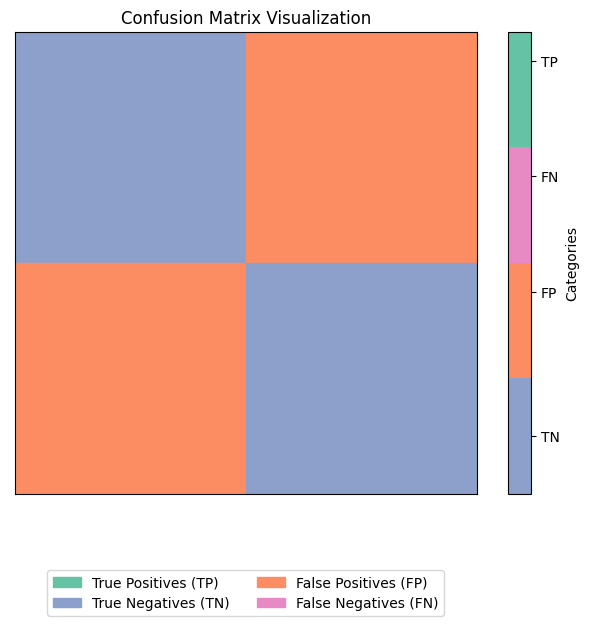

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import matplotlib.colors as mcolors

# Définir les couleurs pour TP, TN, FP et FN
color_tp = '#66c2a5'  # True Positives
color_tn = '#8da0cb'  # True Negatives
color_fp = '#fc8d62'  # False Positives
color_fn = '#e78ac3'  # False Negatives

# Créer une figure et un axe
fig, ax = plt.subplots(figsize=(8, 6))

# Créer une matrice avec les couleurs pour la barre des valeurs
data = np.array([
    [0, 1],  # TN, FP
    [1, 0]   # FN, TP
])

# Créer une carte des couleurs
cmap = mcolors.ListedColormap([color_tn, color_fp, color_fn, color_tp])
bounds = [0, 0.5, 1.5, 2.5, 3.5]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Ajouter les rectangles pour chaque partie de la matrice
for i in range(2):
    for j in range(2):
        rect = patches.Rectangle((j*0.5, (1-i)*0.5), 0.5, 0.5, color=cmap(norm(data[i, j])))
        ax.add_patch(rect)

# Ajouter une barre des valeurs à droite
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, orientation='vertical', ticks=[0.25, 1.25, 2.25, 3.25])
cbar.ax.set_yticklabels(['TN', 'FP', 'FN', 'TP'])
cbar.set_label('Categories')

# Ajuster les axes
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')

# Ajouter les légendes pour chaque couleur
patches_list = [
    patches.Patch(color=color_tp, label='True Positives (TP)'),
    patches.Patch(color=color_tn, label='True Negatives (TN)'),
    patches.Patch(color=color_fp, label='False Positives (FP)'),
    patches.Patch(color=color_fn, label='False Negatives (FN)')
]

plt.legend(handles=patches_list, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.title('Confusion Matrix Visualization')

# Afficher le graphique
plt.show()


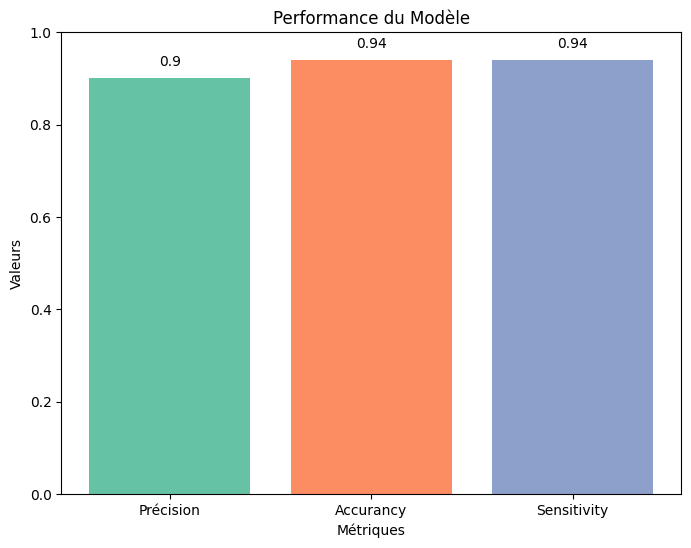

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Données fictives pour les performances du modèle
metrics = ['Précision', 'Accurancy', 'Sensitivity']
values = [0.90, 0.94, 0.94]  # Remplacez ces valeurs par celles de votre modèle

# Créer une figure et un axe
fig, ax = plt.subplots(figsize=(8, 6))

# Créer un histogramme
bars = ax.bar(metrics, values, color=['#66c2a5', '#fc8d62', '#8da0cb'])

# Ajouter des labels et un titre
ax.set_xlabel('Métriques')
ax.set_ylabel('Valeurs')
ax.set_title('Performance du Modèle')
ax.set_ylim(0, 1)

# Ajouter les valeurs sur les barres
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval + 0.02, round(yval, 2), ha='center', va='bottom')

# Afficher le graphique
plt.show()


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Prédire les classes sur les données de test
y_pred = model.predict(X_test)

# Convertir les prédictions en classes (en utilisant l'argmax)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculer l'accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)

# Calculer la précision, le rappel et le score F1 pour chaque classe
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Afficher les résultats
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall (Sensitivity): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Accuracy: 0.92
Precision: 0.92
Recall (Sensitivity): 0.92
F1 Score: 0.91
Confusion Matrix:
[[4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]


c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
import cv2
import numpy as np
import mediapipe as mp
from tensorflow.keras.models import load_model
import tensorflow as tf



# Charger le modèle pré-entraîné
model = tf.keras.models.load_model(r'C:/Users/Nessrine/StudioProjects/flask-app/CNN+LSTM.h5')

# Définir les couleurs pour les actions
colors = [(245,117,16), (117,245,16), (16,117,245)] * (len(actions) // 3 + 1)
colors = colors[:len(actions)]  # S'assurer que colors a la même longueur que actions

def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        if num >= len(actions):  # Vérifier que l'indice est dans les limites
            break
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    return output_frame

# Variables pour la détection des gestes
sequence = []            # Liste pour stocker les séquences de points clés
sentence = []            # Liste pour stocker les actions détectées successivement
predictions = []        # Liste pour stocker les prédictions du modèle
threshold = 0.8          # Seuil de confiance pour valider une prédiction

# Ouvrir la capture vidéo à partir de la webcam
cap = cv2.VideoCapture(0)

# Initialiser le modèle Mediapipe pour la détection des gestes
with mp.solutions.holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Lire une image du flux vidéo
        ret, frame = cap.read()

        # Effectuer des détections sur l'image
        image, results = mediapipe_detection(frame, holistic)
        
        # Dessiner les repères sur l'image
        draw_styled_landmarks(image, results)
        
        # Logique de prédiction
        keypoints = extract_keypoints(results)  # Extraire les points clés de l'image
        sequence.append(keypoints)             # Ajouter les points clés à la séquence
        sequence = sequence[-20:]              # Conserver seulement les 20 derniers frames
        
        if len(sequence) == 20:                # Si la séquence contient 20 frames
            sequence_np = np.array(sequence, dtype=np.float32)  # Convertir en numpy array avec type float32
            res = model.predict(np.expand_dims(sequence_np, axis=0))[0]  # Prédire l'action à partir de la séquence
            print(actions[np.argmax(res)])    # Afficher l'action prédite
            predictions.append(np.argmax(res))  # Ajouter la prédiction à la liste des prédictions
            
            # Logique de visualisation
            if np.unique(predictions[-10:])[0] == np.argmax(res):  # Si la prédiction dominante sur les 10 derniers frames est constante
                if res[np.argmax(res)] > threshold:  # Vérifier si la probabilité est au-dessus du seuil
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:  # Ajouter l'action à la sentence si elle est différente de la précédente
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])  # Ajouter la première action détectée à la sentence

            if len(sentence) > 5:  # Limiter la taille de la sentence à 5 actions
                sentence = sentence[-5:]

            # Visualiser les probabilités de chaque action
            image = prob_viz(res, actions, image, colors)
        
        # Dessiner un fond coloré et ajouter le texte de la sentence sur l'image
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,40), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Afficher l'image avec les visualisations
        cv2.imshow('OpenCV Feed', image)

        # Quitter la boucle lorsque la touche 'q' est pressée
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

# Libérer la capture vidéo et fermer toutes les fenêtres ouvertes
cap.release()
cv2.destroyAllWindows()


c:\Users\Nessrine\AppData\Local\Programs\Python\Python310\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
lissar
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
lissar
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
lissar
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
lissar
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
lissar
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
lissar
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
lissar
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
lissar
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
lissar
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
lissar
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
lissar
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
lissar
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
lissar
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
lissar
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
lissar
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
lissar
